# Import libraries first


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)



# import datasets to jupyter


In [2]:
path1="C:/Users/mojde/OneDrive/Desktop/python data set project 1/title.basics.csv"
df1=pd.read_csv(path1)
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
df1.isna().sum()/len(df1)*100

tconst              0.000000
primary_title       0.000684
original_title      0.015054
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

In [4]:
path2="C:/Users/mojde/OneDrive/Desktop/python data set project 1/title.ratings.csv"
df2=pd.read_csv(path2)
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
df2.isna().sum()/len(df2)*100

tconst           0.0
averagerating    0.0
numvotes         0.0
dtype: float64

In [6]:
path3="C:/Users/mojde/OneDrive/Desktop/python data set project 1/bom.movie_gross (1).csv/bom.movie_gross.csv"
df3=pd.read_csv(path3)
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
df3.isna().sum()/len(df3)*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [8]:
df4=pd.read_csv("C:/Users/mojde/OneDrive/Desktop/python data set project 1/title.principals.csv")
df4.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [9]:
df5=pd.read_csv("C:/Users/mojde/OneDrive/Desktop/python data set project 1/name.basics.csv")
df5.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


# merging and cleaning datasets 


In [10]:
#mergin df1 &df2 
dfa=df1.merge(df2,how="inner")
dfa.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [11]:
dfb=df3.merge(dfa,left_on='title',right_on='primary_title',left_index=False,right_index=False,how="inner")
dfb.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [12]:
dfc=df4.merge(dfb,how="inner")
dfc.head()

,tconst,ordering,nconst,category,job,characters,title,studio,domestic_gross,foreign_gross,year,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0475290,10,nm0005683,cinematographer,director of photography,NaN,"Hail, Caesar!",Uni.,30500000.0,33100000,2016,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,111422
1,tt0475290,1,nm0000982,actor,NaN,"[""Eddie Mannix""]","Hail, Caesar!",Uni.,30500000.0,33100000,2016,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,111422
2,tt0475290,2,nm0000123,actor,NaN,"[""Baird Whitlock""]","Hail, Caesar!",Uni.,30500000.0,33100000,2016,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,111422
3,tt0475290,3,nm2403277,actor,NaN,"[""Hobie Doyle""]","Hail, Caesar!",Uni.,30500000.0,33100000,2016,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,111422
4,tt0475290,4,nm0000146,actor,NaN,"[""Laurence Laurentz""]","Hail, Caesar!",Uni.,30500000.0,33100000,2016,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,111422


In [13]:
df=dfc.merge(df5,how="inner")
df.head()

,tconst,ordering,nconst,category,job,characters,title,studio,domestic_gross,foreign_gross,...,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0475290,10,nm0005683,cinematographer,director of photography,NaN,"Hail, Caesar!",Uni.,30500000.0,33100000,...,2016,106.0,"Comedy,Drama,Music",6.3,111422,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884"
1,tt1172991,9,nm0005683,cinematographer,director of photography,NaN,The Company Men,Wein.,4400000.0,441000,...,2010,104.0,Drama,6.8,41139,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884"
2,tt1403865,10,nm0005683,cinematographer,director of photography,NaN,True Grit,Par.,171200000.0,81000000,...,2010,110.0,"Adventure,Drama,Western",7.6,284034,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884"
3,tt1637688,9,nm0005683,cinematographer,director of photography,NaN,In Time,Fox,37500000.0,136400000,...,2011,109.0,"Action,Crime,Drama",6.7,346077,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884"
4,tt0475290,1,nm0000982,actor,NaN,"[""Eddie Mannix""]","Hail, Caesar!",Uni.,30500000.0,33100000,...,2016,106.0,"Comedy,Drama,Music",6.3,111422,Josh Brolin,1968.0,NaN,"actor,producer,writer","tt4154756,tt1175491,tt0477348,tt1791528"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29385 entries, 0 to 29384
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tconst              29385 non-null  object 
 1   ordering            29385 non-null  int64  
 2   nconst              29385 non-null  object 
 3   category            29385 non-null  object 
 4   job                 10142 non-null  object 
 5   characters          11801 non-null  object 
 6   title               29385 non-null  object 
 7   studio              29355 non-null  object 
 8   domestic_gross      29176 non-null  float64
 9   foreign_gross       17789 non-null  object 
 10  year                29385 non-null  int64  
 11  primary_title       29385 non-null  object 
 12  original_title      29385 non-null  object 
 13  start_year          29385 non-null  int64  
 14  runtime_minutes     29006 non-null  float64
 15  genres              29335 non-null  object 
 16  aver

In [15]:
#change dfc[foeign_gross] and dfc['domestic_gross'] as numeric and make new total gross columns
df['foreign_gross']=pd.to_numeric(df['foreign_gross'],errors='coerce').fillna(0)


df['foreign_gross'].astype(int)

df["domestic_gross"]=pd.to_numeric(df["domestic_gross"],errors='coerce').fillna(0)


df['domestic_gross'].astype(int)

df['total_gross(million)']=(df['domestic_gross']+df['foreign_gross'])/1000



In [16]:
#now we are gonna remove columns that we are not using them 


df.drop("primary_title",axis=1,inplace=True)
df.drop("original_title",axis=1,inplace=True)

df.drop('job',axis=1,inplace=True)
df.drop('characters',axis=1,inplace=True)
df.drop('nconst',axis=1,inplace=True)
df.drop('tconst',axis=1,inplace=True)
df.drop('birth_year',axis=1,inplace=True)
df.drop('death_year',axis=1,inplace=True)


In [17]:
df.isna().sum()/ len(df)*100 

ordering                0.000000
category                0.000000
title                   0.000000
studio                  0.102093
domestic_gross          0.000000
foreign_gross           0.000000
year                    0.000000
start_year              0.000000
runtime_minutes         1.289774
genres                  0.170155
averagerating           0.000000
numvotes                0.000000
primary_name            0.000000
primary_profession      1.068572
known_for_titles        0.282457
total_gross(million)    0.000000
dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29385 entries, 0 to 29384
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ordering              29385 non-null  int64  
 1   category              29385 non-null  object 
 2   title                 29385 non-null  object 
 3   studio                29355 non-null  object 
 4   domestic_gross        29385 non-null  float64
 5   foreign_gross         29385 non-null  float64
 6   year                  29385 non-null  int64  
 7   start_year            29385 non-null  int64  
 8   runtime_minutes       29006 non-null  float64
 9   genres                29335 non-null  object 
 10  averagerating         29385 non-null  float64
 11  numvotes              29385 non-null  int64  
 12  primary_name          29385 non-null  object 
 13  primary_profession    29071 non-null  object 
 14  known_for_titles      29302 non-null  object 
 15  total_gross(million

In [19]:
#based on percentage of our NAN data in our df ,we dont need to replace NAN with anything we can remove them
#-for the columns that we want to use them such as :genres,primary_profession

df=df.dropna(subset=['genres'])
df=df.dropna(subset=['primary_profession'])

# cleaning merging datasets

In [20]:
#finding duplications and remove them
repeated=df.duplicated().sum()
repeated

0

In [21]:
# try to find out correlation between numeric columns


numeric_columns=df.select_dtypes(include=['float64','int64'])
correlation=numeric_columns.corr()
correlation


,ordering,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,total_gross(million)
ordering,1.000000,0.001269,0.001737,0.000440,0.000119,0.016178,0.002829,0.010249,0.001638
domestic_gross,0.001269,1.000000,0.812941,0.007934,0.036390,0.137350,0.130101,0.674430,0.922580
foreign_gross,0.001737,0.812941,1.000000,0.027028,0.051244,0.160774,0.116112,0.602818,0.974676
year,0.000440,0.007934,0.027028,1.000000,0.825470,0.034545,0.045455,-0.126764,0.020953
start_year,0.000119,0.036390,0.051244,0.825470,1.000000,0.081300,0.002338,-0.080596,0.047924
runtime_minutes,0.016178,0.137350,0.160774,0.034545,0.081300,1.000000,0.178935,0.255178,0.159226
averagerating,0.002829,0.130101,0.116112,0.045455,0.002338,0.178935,1.000000,0.294516,0.126884
numvotes,0.010249,0.674430,0.602818,-0.126764,-0.080596,0.255178,0.294516,1.000000,0.658353
total_gross(million),0.001638,0.922580,0.974676,0.020953,0.047924,0.159226,0.126884,0.658353,1.000000


In [22]:
df['genres']=df['genres'].astype(str)

In [23]:
df['genres'] = df['genres'].str.split(',')
df.head()

,ordering,category,title,studio,domestic_gross,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,known_for_titles,total_gross(million)
0,10,cinematographer,"Hail, Caesar!",Uni.,30500000.0,33100000.0,2016,2016,106.0,"[Comedy, Drama, Music]",6.3,111422,Roger Deakins,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884",63600.0
1,9,cinematographer,The Company Men,Wein.,4400000.0,441000.0,2011,2010,104.0,[Drama],6.8,41139,Roger Deakins,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884",4841.0
2,10,cinematographer,True Grit,Par.,171200000.0,81000000.0,2010,2010,110.0,"[Adventure, Drama, Western]",7.6,284034,Roger Deakins,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884",252200.0
3,9,cinematographer,In Time,Fox,37500000.0,136400000.0,2011,2011,109.0,"[Action, Crime, Drama]",6.7,346077,Roger Deakins,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884",173900.0
4,1,actor,"Hail, Caesar!",Uni.,30500000.0,33100000.0,2016,2016,106.0,"[Comedy, Drama, Music]",6.3,111422,Josh Brolin,"actor,producer,writer","tt4154756,tt1175491,tt0477348,tt1791528",63600.0


In [24]:
df=df.explode('genres')
df.head()

,ordering,category,title,studio,domestic_gross,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,known_for_titles,total_gross(million)
0,10,cinematographer,"Hail, Caesar!",Uni.,30500000.0,33100000.0,2016,2016,106.0,Comedy,6.3,111422,Roger Deakins,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884",63600.0
0,10,cinematographer,"Hail, Caesar!",Uni.,30500000.0,33100000.0,2016,2016,106.0,Drama,6.3,111422,Roger Deakins,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884",63600.0
0,10,cinematographer,"Hail, Caesar!",Uni.,30500000.0,33100000.0,2016,2016,106.0,Music,6.3,111422,Roger Deakins,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884",63600.0
1,9,cinematographer,The Company Men,Wein.,4400000.0,441000.0,2011,2010,104.0,Drama,6.8,41139,Roger Deakins,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884",4841.0
2,10,cinematographer,True Grit,Par.,171200000.0,81000000.0,2010,2010,110.0,Adventure,7.6,284034,Roger Deakins,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884",252200.0


# which genre has the highest avg of total_gross(million)

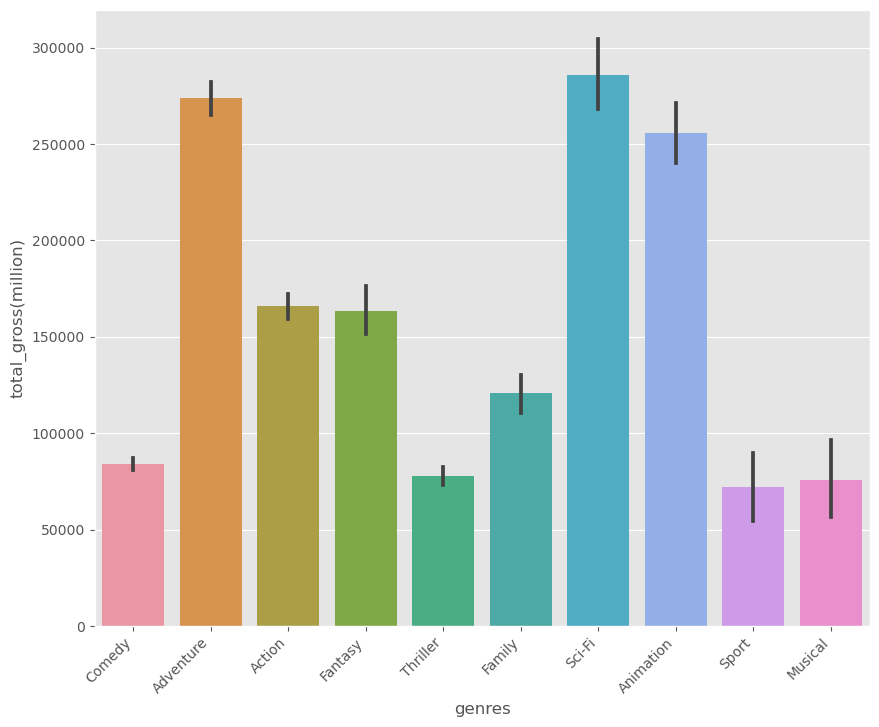

In [25]:
# group df by genres
avg_gross_for_genres = df.groupby("genres")["total_gross(million)"].mean().sort_values(ascending=False)

# Select the top five genres
top_five_genres = avg_gross_for_genres.head(10).index

# Filter the original DataFrame to include only the top five genres
dfc_top_five_genres = df[df['genres'].isin(top_five_genres)]

plt.figure(figsize=(10, 8))

# Use seaborn's barplot with hue parameter to distinguish genres
sns.barplot(x='genres', y='total_gross(million)', data=dfc_top_five_genres)
plt.xticks(rotation=45, ha='right')
plt.show()

#as we can see the highest average of total gross(million) refers to the sci_fi

# which genre has the highest avg rating

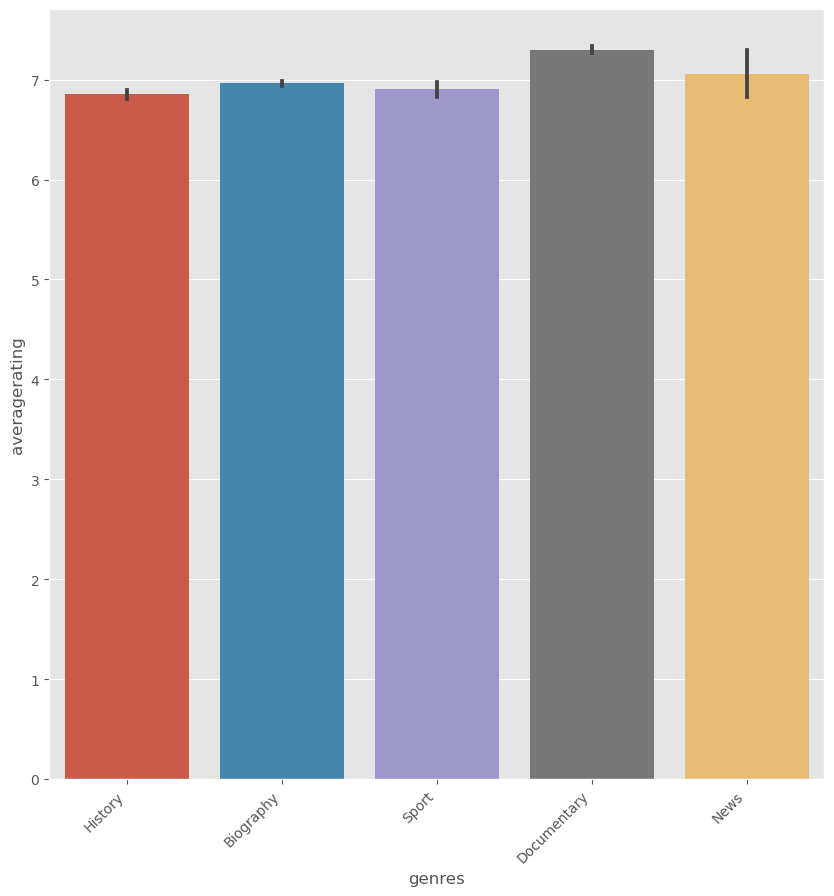

In [26]:
avg_rating_for_genres=df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

top_5_genres=avg_rating_for_genres.head().index

df_top_genres=df[df['genres'].isin(top_5_genres)]


plt.figure(figsize=(10,10))


sns.barplot(x='genres', y='averagerating', data=df_top_genres)
plt.xticks(rotation=45, ha='right')
plt.show()
#as per the graph Documentary has the highest mean of avg rating

# finding genres whith highest avg rating and total gross without plotting


In [27]:
avg_rating_for_genres = df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
highest_avg_genre = avg_rating_for_genres.idxmax()
highest_avg_rating = avg_rating_for_genres.max()
print(f"The genre with the highest average rating is '{highest_avg_genre}' with an average rating of {highest_avg_rating:.2f}.")

The genre with the highest average rating is 'Documentary' with an average rating of 7.30.


In [28]:
total_gross_for_genres = df.groupby('genres')['total_gross(million)'].max().sort_values(ascending=False)
highest_total_genre = total_gross_for_genres.idxmax()
highest_total_gross = total_gross_for_genres.max()
print(f"The genre with the total_gross is '{highest_total_genre}' with an maximum total_gross of {highest_total_gross:.2f}.")

The genre with the total_gross is 'Action' with an maximum total_gross of 1405400.00.


In [29]:
# As we can see in both above code insights Documantry has the highest avg rating and action genre has yhe highest total_gross(million)

# which genres is the most popular based on the avg numberofvotes


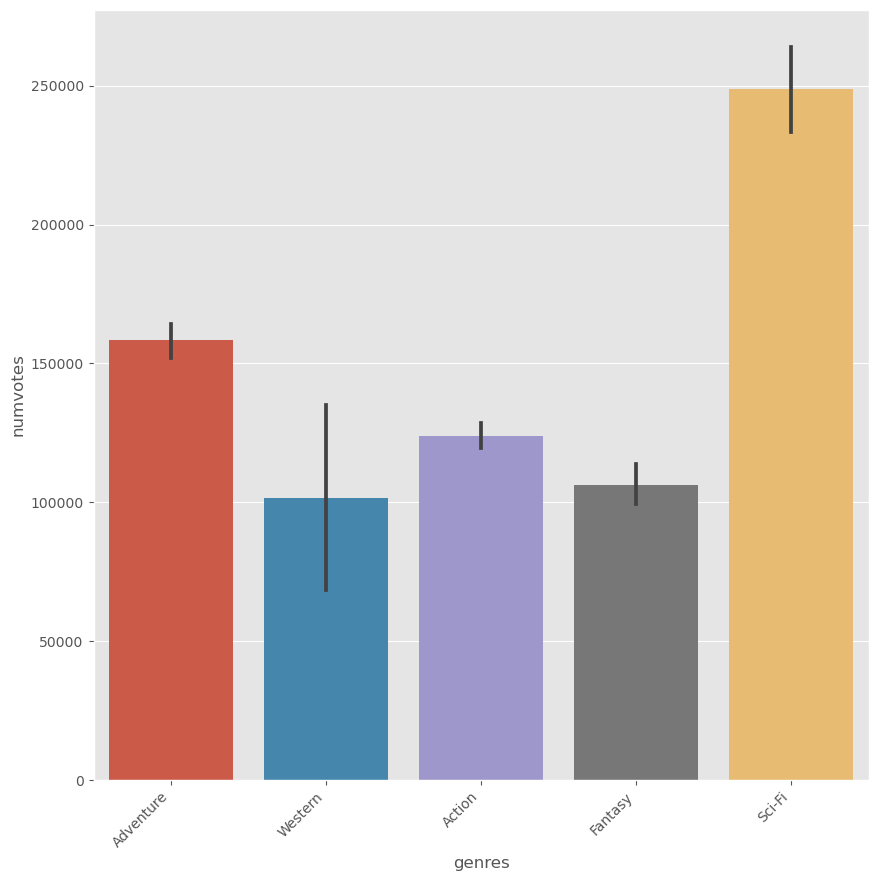

In [30]:
top_genres_numvotes=df.groupby('genres')['numvotes'].mean().sort_values(ascending=False)

top_5_genres=top_genres_numvotes.head().index

top_5_genres_in_df=df[df['genres'].isin(top_5_genres)]

plt.figure(figsize=(10,10))

sns.barplot(x='genres', y='numvotes', data=top_5_genres_in_df)

plt.xticks(rotation=45, ha='right')
plt.show()

# best genres movie based on highest total_gross(million)

In [31]:
df[df['total_gross(million)'].max()==df["total_gross(million)"]][["year","genres","total_gross(million)"]].head(10)

,year,genres,total_gross(million)
766,2015,Action,1405400.0
766,2015,Adventure,1405400.0
766,2015,Sci-Fi,1405400.0
1223,2015,Action,1405400.0
1223,2015,Adventure,1405400.0
1223,2015,Sci-Fi,1405400.0
1233,2015,Action,1405400.0
1233,2015,Adventure,1405400.0
1233,2015,Sci-Fi,1405400.0
1273,2015,Action,1405400.0


# Top  genres with highest avgrating

In [32]:
top_ten=df.nlargest(100,'averagerating')[['genres','primary_name','averagerating']]
top_ten=top_ten.groupby(['genres','primary_name']).mean()
top_ten

averagerating
genres primary_name                       
Action Christopher Nolan               8.8
       Ellen Page                      8.8
       Emma Thomas                     8.8
       Guy Hendrix Dyas                8.8
       Hans Zimmer                     8.8
...                                    ...
Sci-Fi Joseph Gordon-Levitt            8.8
       Ken Watanabe                    8.8
       Lee Smith                       8.8
       Leonardo DiCaprio               8.8
       Wally Pfister                   8.8

[100 rows x 1 columns]

# Best Director  based  on total_gross(million)

In [33]:
df['primary_profession'] = df['primary_profession'].str.split(',')
df=df.explode('primary_profession')
df.head()

,ordering,category,title,studio,domestic_gross,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,known_for_titles,total_gross(million)
0,10,cinematographer,"Hail, Caesar!",Uni.,30500000.0,33100000.0,2016,2016,106.0,Comedy,6.3,111422,Roger Deakins,cinematographer,"tt1856101,tt0116282,tt1074638,tt3397884",63600.0
0,10,cinematographer,"Hail, Caesar!",Uni.,30500000.0,33100000.0,2016,2016,106.0,Comedy,6.3,111422,Roger Deakins,camera_department,"tt1856101,tt0116282,tt1074638,tt3397884",63600.0
0,10,cinematographer,"Hail, Caesar!",Uni.,30500000.0,33100000.0,2016,2016,106.0,Comedy,6.3,111422,Roger Deakins,miscellaneous,"tt1856101,tt0116282,tt1074638,tt3397884",63600.0
0,10,cinematographer,"Hail, Caesar!",Uni.,30500000.0,33100000.0,2016,2016,106.0,Drama,6.3,111422,Roger Deakins,cinematographer,"tt1856101,tt0116282,tt1074638,tt3397884",63600.0
0,10,cinematographer,"Hail, Caesar!",Uni.,30500000.0,33100000.0,2016,2016,106.0,Drama,6.3,111422,Roger Deakins,camera_department,"tt1856101,tt0116282,tt1074638,tt3397884",63600.0


# Best Director with highest total_gross

In [34]:
Best_one=df[df['total_gross(million)'].max()==df['total_gross(million)']][['studio','primary_profession','genres','primary_name','total_gross(million)']]
Best_one.head(10)
#as we can see  "Chris Evans" as director  in BV studio has the most total_gross(million) in "Action and adventure and Sci_Fi"

,studio,primary_profession,genres,primary_name,total_gross(million)
766,BV,actor,Action,Chris Evans,1405400.0
766,BV,producer,Action,Chris Evans,1405400.0
766,BV,director,Action,Chris Evans,1405400.0
766,BV,actor,Adventure,Chris Evans,1405400.0
766,BV,producer,Adventure,Chris Evans,1405400.0
766,BV,director,Adventure,Chris Evans,1405400.0
766,BV,actor,Sci-Fi,Chris Evans,1405400.0
766,BV,producer,Sci-Fi,Chris Evans,1405400.0
766,BV,director,Sci-Fi,Chris Evans,1405400.0
1223,BV,writer,Action,Jack Kirby,1405400.0


C:\Users\mojde\AppData\Local\Temp\ipykernel_19568\2693293338.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_years = action_movies[(df['year'] >= 2010) & (df['year'] <= 2018)]


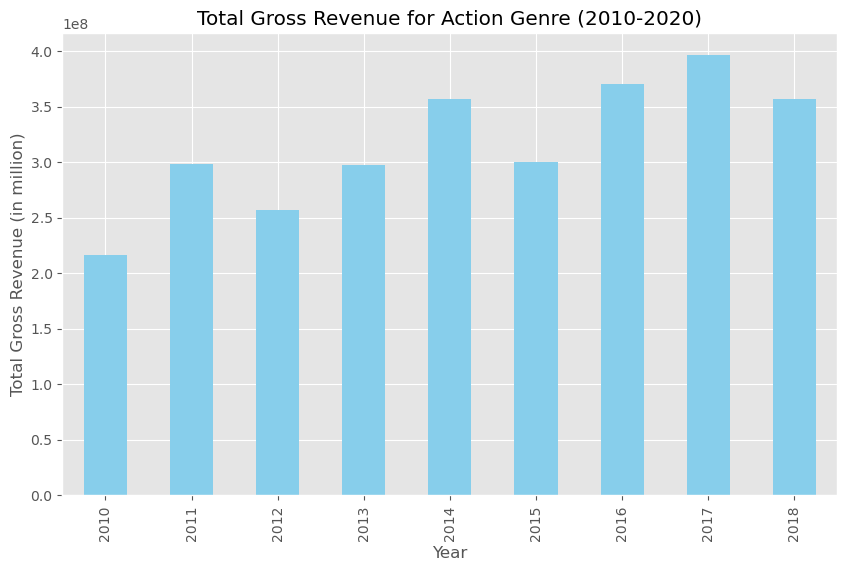

In [35]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop rows where 'year' is NaN
df = df.dropna(subset=['year'])

# Step 1: Filter Data
action_movies = df[df['genres'].str.contains('Action', case=False)]
selected_years = action_movies[(df['year'] >= 2010) & (df['year'] <= 2018)]

# Step 2: Group and Sum
total_gross_by_year = selected_years.groupby('year')['total_gross(million)'].sum()

# Step 3: Plot
plt.figure(figsize=(10, 6))
total_gross_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Gross Revenue for Action Genre (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue (in million)')
plt.show()
